In [1]:
# !wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

In [2]:
import pandas as pd
import numpy as np

# EDA

In [3]:
df = pd.read_csv('jamb_exam_results.csv')
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [5]:
del df['student_id']

In [6]:
df.isna().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [7]:
df = df.fillna(0)
df.isna().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(
    df,
    test_size=0.2,
    shuffle=True, 
    random_state=1
)

In [10]:
df_train, df_val = train_test_split(
    df_full_train,
    test_size=0.25,
    shuffle=True, 
    random_state=1
)

In [11]:
len(df_train), len(df_val), len(df_test)

(3000, 1000, 1000)

In [12]:
y_full_train = df_full_train.jamb_score.values
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [13]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_full_train['jamb_score']
del df_test['jamb_score']

In [14]:
from sklearn.feature_extraction import DictVectorizer

In [15]:
train_dicts = df_train.to_dict(orient = 'records')
val_dicts = df_val.to_dict(orient = 'records')
tes_dicts = df_test.to_dict(orient = 'records')

In [16]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[ 0.,  1., 21., ...,  0., 20.,  3.],
       [ 0.,  1., 22., ...,  1., 11.,  2.],
       [ 0.,  1., 19., ...,  0., 31.,  1.],
       ...,
       [ 0.,  1., 16., ...,  1., 17.,  4.],
       [ 1.,  0., 21., ...,  0., 25.,  2.],
       [ 0.,  1., 17., ...,  0., 18.,  2.]])

In [17]:
dv.get_feature_names_out()

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [18]:
X_val = dv.transform(val_dicts)

# Question 1

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [21]:
dt.predict(X_val)[:5]

array([190, 118, 190, 118, 190])

In [22]:
from sklearn.tree import plot_tree 
from sklearn.tree import export_text 

In [23]:
print(
    export_text(
        dt, 
        feature_names=dv.get_feature_names_out()
    )
)

|--- study_hours_per_week <= 18.50
|   |--- class: 118
|--- study_hours_per_week >  18.50
|   |--- class: 190



#### Answer: Splitting feature is study_hours_per_week

# Question 2

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(
	n_estimators=10, 
    n_jobs=-1,
	random_state=1
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [26]:
from sklearn.metrics import root_mean_squared_error

In [27]:
y_pred = rf.predict(X_val)

In [28]:
float(root_mean_squared_error(y_val, y_pred))

65.51460142594168

#### Answer: RMSE is 65.51

# Question 3

In [29]:
res = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(
    	n_estimators=n, 
        n_jobs=-1,
    	random_state=1
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = float(root_mean_squared_error(y_val, y_pred))
    res.append((n, rmse))

In [30]:
rmse_df = pd.DataFrame(res, columns=['n_estimators', 'rmse'])
rmse_df.head()

,n_estimators,rmse
0,10,65.514601
1,20,59.101777
2,30,58.222358
3,40,57.335966
4,50,56.740127


In [31]:
import matplotlib.pyplot as plt

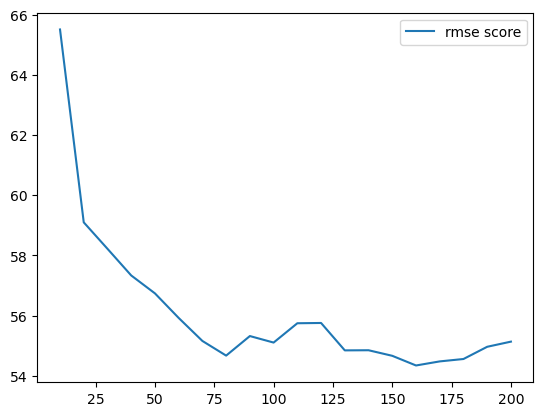

In [32]:
plt.plot(rmse_df.n_estimators, rmse_df.rmse, label='rmse score')
plt.legend()

Let's look closer:

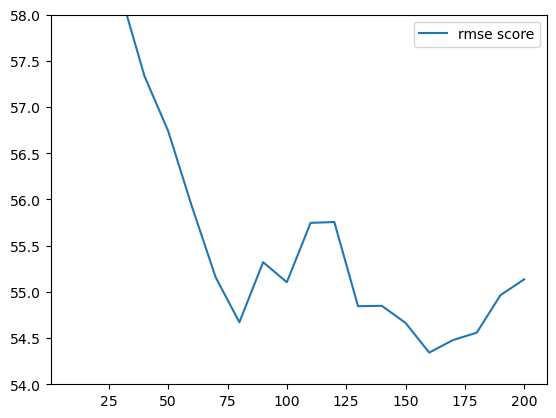

In [33]:
plt.plot(rmse_df.n_estimators, rmse_df.rmse, label='rmse score')
plt.ylim(54, 58)
plt.legend()

#### Answer: Essentially we reach optimal value for n_estimators = 80

# Question 4

In [34]:
res = []
for d in [5, 10, 15, 20, 25]:
    d_rmse = []
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
        	n_estimators=n, 
            max_depth=d,
            n_jobs=-1,
        	random_state=1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = float(root_mean_squared_error(y_val, y_pred))
        d_rmse.append(rmse)
    res.append((d, float(np.mean(d_rmse).round(4))))
res

[(5, 52.0076), (10, 53.648), (15, 54.3229), (20, 56.5384), (25, 56.5206)]

In [35]:
res = sorted(res, key=lambda x: x[1], reverse=True)
res

[(20, 56.5384), (25, 56.5206), (15, 54.3229), (10, 53.648), (5, 52.0076)]

#### Answer: Best max_depth is 20

# Question 5

In [36]:
rf = RandomForestClassifier(
    n_estimators=10, 
    max_depth=20,
    n_jobs=-1,
    random_state=1
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [37]:
fi_df = pd.DataFrame(zip(dv.get_feature_names_out(), rf.feature_importances_), columns=['feature', 'importance'])
fi_df.sort_values('importance', ascending=False)

,feature,importance
5,distance_to_school,0.115719
27,study_hours_per_week,0.109333
4,attendance_rate,0.106952
2,age,0.084565
28,teacher_quality,0.057930
3,assignments_completed,0.043678
21,school_location=Urban,0.024921
20,school_location=Rural,0.024887
12,it_knowledge=Medium,0.024752
11,it_knowledge=Low,0.024267


#### Answer: distance_to_school has the highest importance of 0.115719

# Question 6

In [38]:
!pip install xgboost

In [39]:
import xgboost as xgb

In [40]:
features = list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(
	X_train,
	label=y_train, 
	feature_names=features
)

dval = xgb.DMatrix(
	X_val,
	label=y_val, 
	feature_names=features
)

In [41]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [42]:
def parse_xgb_output(output):
	results = []
	for line in output.stdout.strip().split('\n'):
		num_iter, train_auc, val_auc = line.split('\t')
		
		num_iter = int(num_iter.strip('[]'))
		train_auc = float(train_auc.split(':')[1])
		val_auc = float(val_auc.split(':')[1])
		
		results.append((num_iter, train_auc, val_auc))

	columns = ['num_iter', 'train_auc', 'val_auc']
	df_results = pd.DataFrame(results, columns=columns)
	return df_results

In [43]:
%%capture output_03

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(
	xgb_params,
	dtrain,
	evals=watchlist,
	num_boost_round=100
)

In [44]:
xgb_03_df = parse_xgb_output(output_03)
xgb_03_df.head()

,num_iter,train_auc,val_auc
0,0,42.69552,44.86028
1,1,39.85005,43.06070
2,2,37.95285,41.83772
3,3,36.52203,41.26987
4,4,35.36066,41.02965


In [45]:
%%capture output_01

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(
	xgb_params,
	dtrain,
	evals=watchlist,
	num_boost_round=100
)

In [46]:
xgb_01_df = parse_xgb_output(output_01)
xgb_01_df.head()

,num_iter,train_auc,val_auc
0,0,45.50072,46.99373
1,1,44.12583,45.89771
2,2,42.92815,45.01746
3,3,41.90445,44.27569
4,4,40.94238,43.62411


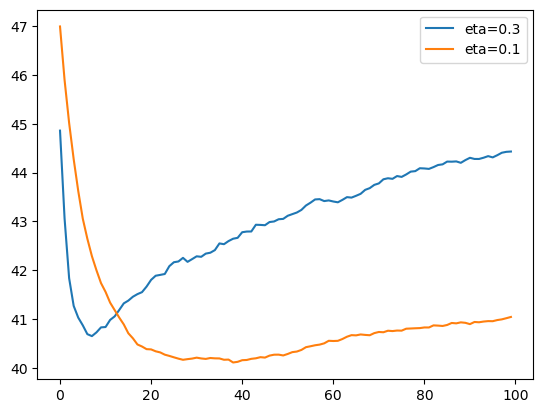

In [47]:
plt.plot(xgb_03_df.num_iter, xgb_03_df.val_auc, label='eta=0.3')
plt.plot(xgb_01_df.num_iter, xgb_01_df.val_auc, label='eta=0.1')
plt.legend()

#### From the graph we can see that eta = 0.1 gives better results on validation dataset